**The Zen of Python**

- Beautiful is better than ugly.
- Explicit is better than implicit.
- Simple is better than complex.
- Complex is better than complicated.
- Flat is better than nested.
- Sparse is better than dense.
- Readability counts.
- Special cases aren't special enough to break the rules.
- Although practicality beats purity.
- Errors should never pass silently.
- Unless explicitly silenced.
- In the face of ambiguity, refuse the temptation to guess.
- There should be one-- and preferably only one --obvious way - to do it.
- Although that way may not be obvious at first unless you're - Dutch.
- Now is better than never.
- Although never is often better than *right* now.
- If the implementation is hard to explain, it's a bad idea.
- If the implementation is easy to explain, it may be a good - idea.
- Namespaces are one honking great idea -- let's do more of - those!

**Common Imports**

The code below shows some of the commonly used imports for working with data in Python

Numpy is a library which allows for working with large arrays of data very quickly and easily

Scipy is a scientific library for data analysis, which we'll just be using one function from, but many more exist for doing many basic and complex types of analysis.

Matplotlib is a plotting library for generating graphs of various kinds. If you install matplotlib locally, these graphs can easily be saved to many different file types and allows for zooming and panning around the graph before saving.

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

**Starting Out**

We'll start out by doing a basic plot using matplotlib, specifically pyplot.
These imports are hidden inside of the grapher class to make things a little neater

I've also made some helper functions for generating data
The linearData function returns three things:
 - An array of x co-ordinates
 - An array of y co-ordinates
 - The function that this data is based on

The data that this returns has some random noise added to prevent it just being a perfect straight line (and to give us a reason for modelling later)

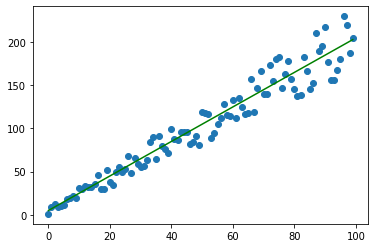

In [4]:
from grapher import *

x, y, f = linearData()

plt.scatter(x, y)
plt.plot(x, f(x), 'g')

The above code should have generated a scatter plot of the linear function, as well as a green line showing the function that generated this data without noise. Try changing the 'g' in the above code to an 'r' if you prefer the colour red to green.  
Your options here are b, g, r, c, m, y, k and w for various different colours

If you want to play around with the above code, the linearData function accepts a few parameters, defaults shown below. 

**Linear Data information**

linearData(n=100, m=2, c=5):
 - n is the number of data points to generate 
 - m is the slope of the function (Increase this number to make the graph steeper) 
 - c is the y offset of the function (Increase this number to lift the graph up)

You can also swap out the linear function for quadratic data if you'd prefer, this also has a couple options for parameters.

**Quadratic Data information**  
quadraticData(n=100, a=1, b=0, c=0):
 - n is the number of data points to generate 
 - a-c are the coefficients for the quadratic function as shown below
 
 $a\cdot x^2 + b\cdot x + c$

**Basic modelling**  
Now we'll move on to a basic model  
We're going to generate some linear data, and then try to fit a linear model to it 
To anyone who has done stats, this may seem like a solved problem, but we're going to start here as a basic example and move to more complex functions later  

We'll first generate our data set, then use curve_fit to find the values used to generate the function, then plot these to show the results

Fits:
m: 1.99
c: 5.52
Actual values:
m: 2.00
c: 5.00


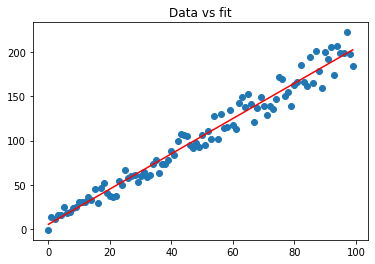

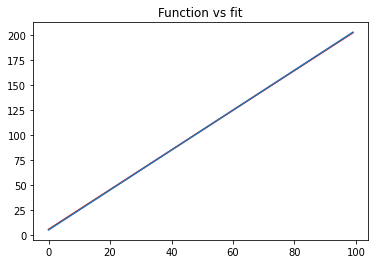

In [16]:
from grapher import *

n = 100
m = 2
c = 5

x, y, f = linearData(n,m,c)
fitFunction = linearFunction

parameters, __ = curve_fit(fitFunction, x, y)

print("Fits:")
print("m: %.2f" % parameters[0])
print("c: %.2f" % parameters[1])
print("Actual values:")
print("m: %.2f" % m)
print("c: %.2f" % c)

plt.title('Data vs fit')
plt.scatter(x,y)
plt.plot(x, fitFunction(x, *parameters), 'r')
plt.show()

plt.title('Function vs fit')
plt.plot(x, fitFunction(x, *parameters), 'r')
plt.plot(x, f(x))

Fits:
a: 1.03
b: 1.00
c: 0.34
Actual values:
a: 1.00
b: 1.00
c: 0.00


/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


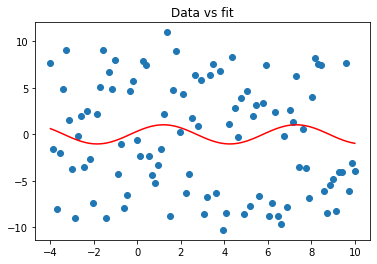

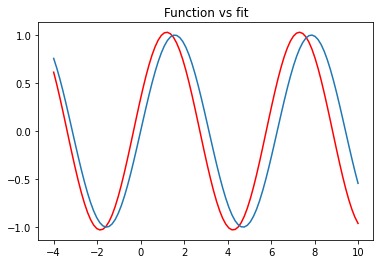

In [1]:
from grapher import *

n = 100
a = 1
b = 1
c = 0

x, y, f = sinData(n,a,b,c)
fitFunction = sinFunction

parameters, __ = curve_fit(fitFunction, x, y)

print("Fits:")
print("a: %.2f" % parameters[0])
print("b: %.2f" % parameters[1])
print("c: %.2f" % parameters[2])
print("Actual values:")
print("a: %.2f" % a)
print("b: %.2f" % b)
print("c: %.2f" % c)

plt.title('Data vs fit')
plt.scatter(x,y)
plt.plot(x, fitFunction(x, *parameters), 'r')
plt.show()

plt.title('Function vs fit')
plt.plot(x, fitFunction(x, *parameters), 'r')
plt.plot(x, f(x))